
---

### **Task 1 of Mini Project: Text Classification on a Text Dataset using Machine Learning**

## Instructions:
- **Objective:** Perform text classification on a text dataset. You will apply various text processing techniques, generate features, and train machine learning models to classify text into appropriate categories.
- **Dataset:** Based on your mini project title
- **Task Requirements:**
  - Follow the instructions in each section.
  - You will generate various features, train multiple machine learning models, and analyze the results.
  - At the end, provide a detailed analysis of your findings.

---

### **Section 1: Load the Dataset**

```python
# Student Code: Load the dataset
import pandas as pd

# Example: Load your dataset (replace with the actual dataset path or URL)
df = pd.read_csv("path_to_your_text_dataset.csv")

# Display the first few rows to understand the structure
df.head()
```

**Instructions:**
- Load your text dataset into a pandas DataFrame.
- Check the structure of the dataset (columns, data types, etc.) and ensure it contains text and target labels (for classification tasks).

---

### **Section 2: Perform Exploratory Data Analysis (EDA)**

```python
# Student Code: Perform EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Display dataset info and summary statistics
print(df.info())
print(df.describe())

# Visualize the class distribution (if it's a classification task)
sns.countplot(x='target_column', data=df)
plt.title("Class Distribution")
plt.show()

# Check for missing values
print(df.isnull().sum())
```

**Instructions:**
- Perform basic EDA to understand the distribution of the dataset (e.g., number of rows, columns, and data types).
- Visualize the class distribution (if it’s a classification task).
- Check for any missing values in the dataset and handle them appropriately.

---

### **Section 3: Perform Text Processing on Dataset**

```python
# Student Code: Text Processing (Cleaning the data)
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove non-alphabetic characters and lowercase the text
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    return text

# Apply text cleaning to the dataset
df['cleaned_text'] = df['text_column'].apply(clean_text)

# Display cleaned text
df[['text_column', 'cleaned_text']].head()
```

**Instructions:**
- Clean the text by removing non-alphabetic characters and converting all text to lowercase.
- Optionally, remove stopwords (common words like 'the', 'and', etc.) to reduce noise in the text.

---

### **Section 4: Generate NLP-Based Features**

```python
# Student Code: Generate NLP-based features
import numpy as np

def generate_nlp_features(df):
    # Character count
    df['char_count'] = df['cleaned_text'].apply(len)
    # Word count
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
    # Average word length
    df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
    # Stopword count
    df['stopword_count'] = df['cleaned_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
    # Hashtag count (for datasets like tweets)
    df['htag_count'] = df['cleaned_text'].apply(lambda x: x.count('#'))
    
    return df

# Generate NLP features
df = generate_nlp_features(df)
df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']].head()
```

**Instructions:**
- Generate features based on the text, such as:
  1. **Character count** — Number of characters in the text.
  2. **Word count** — Number of words in the text.
  3. **Average word length** — Average length of words in the text.
  4. **Stopword count** — Number of stopwords in the text.
  5. **Hashtag count** — If applicable (for datasets like tweets).
  
---

### **Section 5: Generate Bag of Words, TFIDF, and FastText Features**

```python
# Student Code: Generate Bag of Words, TFIDF, and FastText features
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import fasttext

# Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

# TFIDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# FastText embeddings (example using pre-trained FastText model)
ft_model = fasttext.load_model('cc.en.300.bin')

def get_fasttext_embeddings(text):
    words = text.split()
    word_vectors = [ft_model.get_word_vector(word) for word in words]
    return np.mean(word_vectors, axis=0)

df['fasttext_embeddings'] = df['cleaned_text'].apply(get_fasttext_embeddings)
```

**Instructions:**
- **Bag of Words (BoW):** Use `CountVectorizer` to generate a matrix of word counts from the text.
- **TFIDF:** Use `TfidfVectorizer` to generate a matrix of term frequency-inverse document frequency scores.
- **FastText:** Use pre-trained FastText embeddings to generate word vectors for the text.

---

### **Section 6: Train All Supervised Models on NLP-Based Features**

```python
# Student Code: Train Models on NLP Features (char_count, word_count, etc.)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df['target_column']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (Random Forest as an example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
```

**Instructions:**
- Train various machine learning models (e.g., Random Forest, SVM, Logistic Regression) on the NLP-based features.
- Compare the performance of the models using accuracy or other metrics.

---

### **Sections 7-9: Train Models on BoW, TFIDF, and FastText Features**

```python
# Train models on Bag of Words (BoW), TFIDF, and FastText features
# Example for Bag of Words
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'BoW Accuracy: {accuracy_score(y_test, y_pred)}')

# Repeat for TFIDF and FastText embeddings
# Example for TFIDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')

# Example for FastText embeddings
X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['fasttext_embeddings']), y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'FastText Accuracy: {accuracy_score(y_test, y_pred)}')
```

**Instructions:**
- Train models on Bag of Words, TFIDF, and FastText features separately.
- Evaluate the performance of each model.

---

### **Section 10: Train Models on All Combined Features with TFIDF**

```python
# Student Code: Train Models on Combined Features (NLP + TFIDF)
from scipy.sparse import hstack

# Combine NLP features and TFIDF features
X_combined = hstack([X, X_tfidf])

# Train model and evaluate
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Combined Features Accuracy: {accuracy_score(y_test, y_pred)}')
```

**Instructions:**
- Combine all NLP-based features (e.g., char count, stopword count, etc.) with the TFIDF features.
- Train a model on the combined features and evaluate performance.

---

### **Section 11: Save the Model and Make Predictions on Real-World Input**

```python
# Student Code: Save the model and make predictions on new data
import joblib

# Save the trained model
joblib.dump(model, 'text_classification_model.pkl')

# Load the model for predictions
loaded_model = joblib.load('text_classification_model.pkl')

# Example: Make predictions on real-world input (e.g., a new text)
new_text = ["This is a new text sample to classify."]
new_text_cleaned = [clean_text(text) for text in new_text]
new_text_features = bow_vectorizer.transform(new_text_cleaned)

# Predict using the trained model
prediction = loaded_model.predict(new_text_features)
print(f'Prediction for new text: {prediction}')
```

**Instructions:**
- Save the trained model to a file using `joblib`.
- Load the saved model and make predictions on new, real-world text data.

---

### **Section 12: Provide Analysis on Results**

```markdown
### Analysis:
- Discuss the results from each model and feature set.
- Which feature set (NLP features, BoW, TFIDF, FastText, combined features) performed the best? Why do you think that is?
- Reflect on any challenges or interesting findings during the task.
- Suggest potential improvements, models, or further experiments that could be tried.
```

**Instructions:**
- Summarize and analyze the results from all sections.
- Discuss which features and models worked best, and provide insights into the classification task.
- Provide suggestions for improvements or future work.

---

This template should give students a comprehensive framework for the task. Let me know if you'd like to make any modifications or need additional explanations for any section!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive/


MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Student Code: Load the dataset
import pandas as pd

dataset_path = '/content/drive/MyDrive/Fashion_Trend_Cloth_Dataset_Unique.csv'

df = pd.read_csv(dataset_path)


df.head()

,Input (Clothing Description),Output (Category)
0,"A loose black linen scarf, designed for both s...",Seasonal (Summer)
1,"A loose brown wool skirt, featuring intricate ...",Vintage
2,"A flared black denim hoodie, stitched with att...",Seasonal (Winter)
3,"A flared pink chiffon t-shirt, stitched with a...",Vintage
4,"A baggy red chiffon blazer, featuring intricat...",Vintage


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.5/393.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=dfc1dcd34c752ff3656508fb8795b46534db0df4be9db8f8859832100f832f13
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Input (Clothing Description)  1000 non-null   object
 1   Output (Category)             1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None
                             Input (Clothing Description) Output (Category)
count                                                1000              1000
unique                                               1000                 4
top     A loose black linen scarf, designed for both s...           Vintage
freq                                                    1               266
Input (Clothing Description)    0
Output (Category)               0
dtype: int64


<ipython-input-6-e8fe9fb3fe73>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


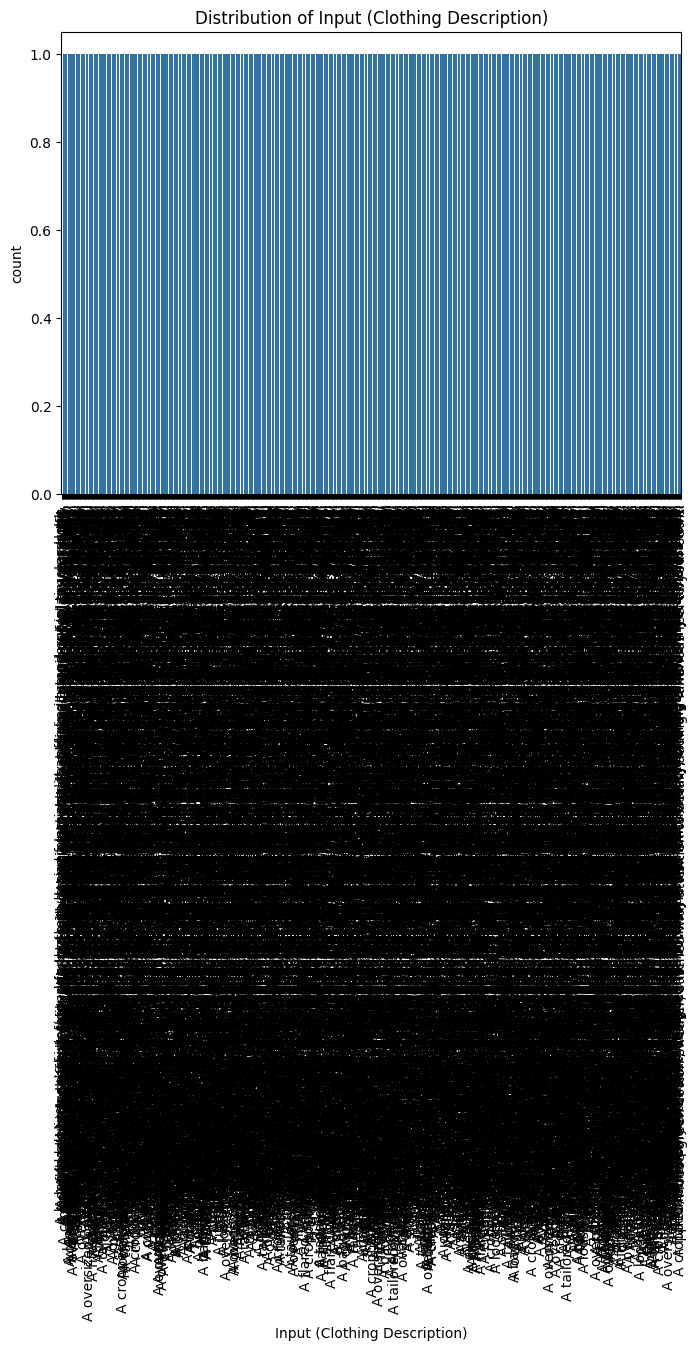

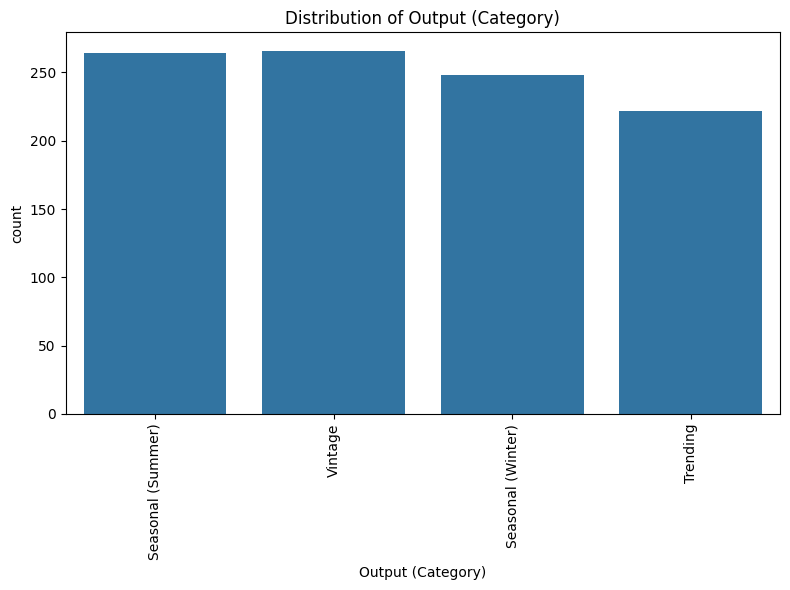

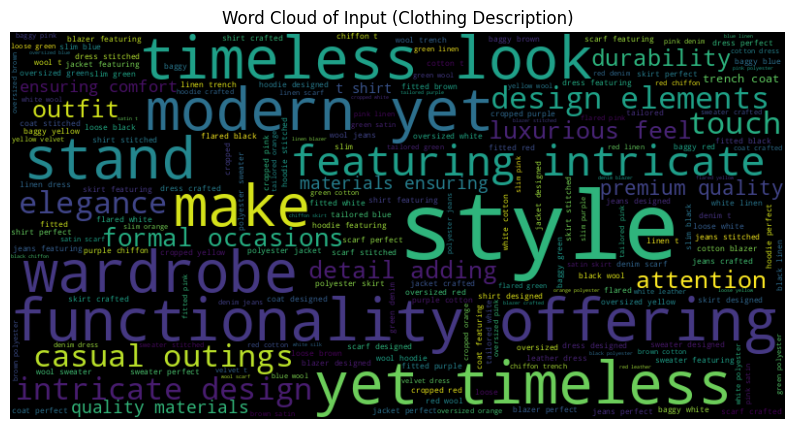

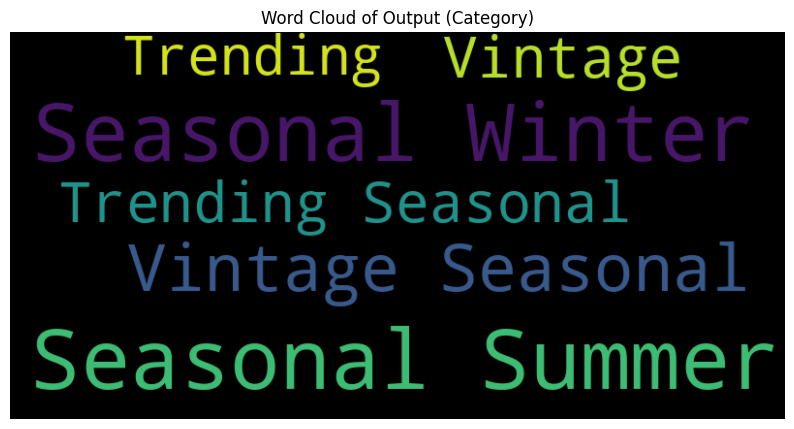

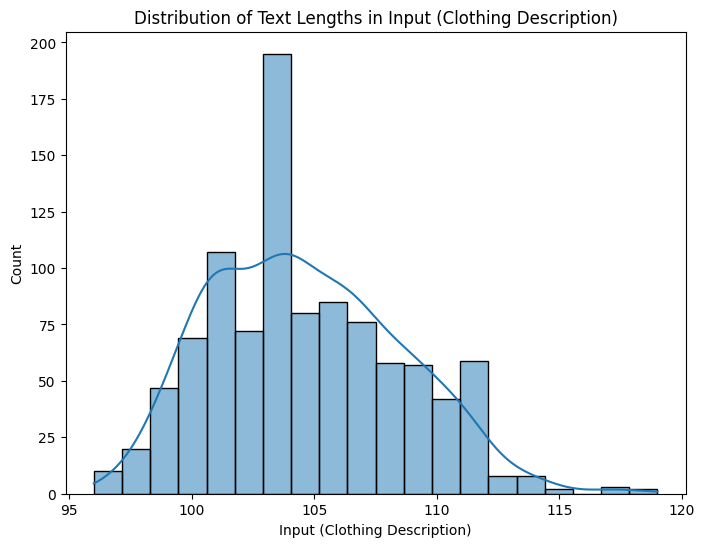

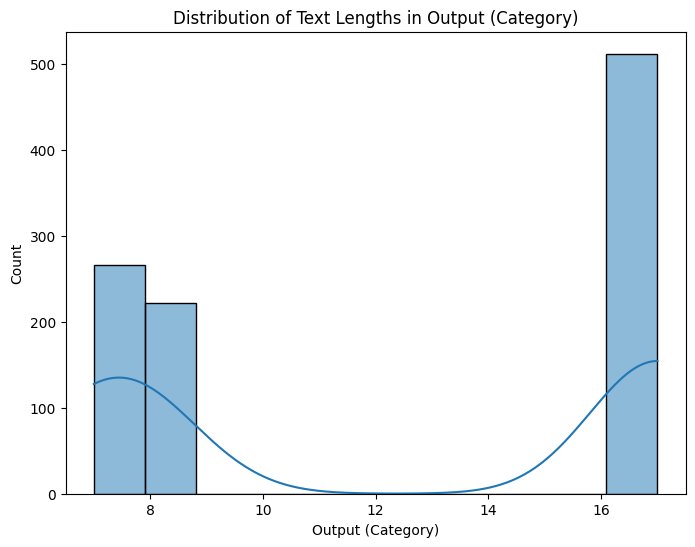

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Install ydata_profiling if not already installed
!pip install ydata_profiling

# Import necessary libraries
import pandas as pd
from ydata_profiling import ProfileReport

# Assuming df is your DataFrame

# Display dataset info and summary statistics
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Bar plots for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Word Clouds for text columns
from wordcloud import WordCloud
for col in categorical_cols:
    text = ' '.join(df[col].astype(str))
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud of {col}")
    plt.show()

# Text Length Distribution
for col in categorical_cols:
    text_lengths = df[col].apply(lambda x: len(str(x)))
    plt.figure(figsize=(8, 6))
    sns.histplot(text_lengths, kde=True)
    plt.title(f"Distribution of Text Lengths in {col}")
    plt.show()

# Use ydata_profiling for a detailed report
profile = ProfileReport(df, title="Exploratory Data Analysis Report")
profile


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd

# Download necessary NLTK resources
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Set of stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove non-alphabetic characters and lowercase the text
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply text cleaning to the dataset
df['cleaned_description'] = df['Input (Clothing Description)'].apply(clean_text)

# Display cleaned text
df[['Input (Clothing Description)', 'cleaned_description', 'Output (Category)']].head()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Input (Clothing Description),cleaned_description,Output (Category)
0,"A loose black linen scarf, designed for both s...",loose black linen scarf designed style functio...,Seasonal (Summer)
1,"A loose brown wool skirt, featuring intricate ...",loose brown wool skirt featuring intricate des...,Vintage
2,"A flared black denim hoodie, stitched with att...",flared black denim hoodie stitched attention d...,Seasonal (Winter)
3,"A flared pink chiffon t-shirt, stitched with a...",flared pink chiffon tshirt stitched attention ...,Vintage
4,"A baggy red chiffon blazer, featuring intricat...",baggy red chiffon blazer featuring intricate d...,Vintage


In [ ]:
print(df.columns.tolist())

['Input (Clothing Description)', 'Output (Category)', 'cleaned_description']


In [ ]:
import numpy as np
import re
from nltk.corpus import stopwords

# Set of stopwords
stop_words = set(stopwords.words('english'))

def generate_nlp_features(df):
    # Character count
    df['char_count'] = df['cleaned_description'].apply(len)

    # Word count
    df['word_count'] = df['cleaned_description'].apply(lambda x: len(x.split()))

    # Average word length
    df['avg_word_length'] = df['cleaned_description'].apply(lambda x: np.mean([len(word) for word in x.split()]) if x.split() else 0)

    # Stopword count
    df['stopword_count'] = df['cleaned_description'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

    # Hashtag count (for datasets like tweets)
    df['htag_count'] = df['cleaned_description'].apply(lambda x: x.count('#'))

    # Special character count
    df['special_char_count'] = df['cleaned_description'].apply(lambda x: len(re.findall(r'[^a-zA-Z0-9\s]', x)))

    # Unique word count
    df['unique_word_count'] = df['cleaned_description'].apply(lambda x: len(set(x.split())))

    # Longest word length
    df['longest_word_length'] = df['cleaned_description'].apply(lambda x: max([len(word) for word in x.split()]) if x.split() else 0)

    # Shortest word length
    df['shortest_word_length'] = df['cleaned_description'].apply(lambda x: min([len(word) for word in x.split()]) if x.split() else 0)

    # Word length variance
    df['word_length_variance'] = df['cleaned_description'].apply(lambda x: np.var([len(word) for word in x.split()]) if len(x.split()) > 1 else 0)

    return df

# Generate NLP features
df = generate_nlp_features(df)

# Display generated features
print(df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count',
          'special_char_count', 'unique_word_count', 'longest_word_length', 'shortest_word_length',
          'word_length_variance']].head())


   char_count  word_count  avg_word_length  stopword_count  htag_count  \
0          86          12         6.250000               0           0   
1          77          11         6.090909               0           0   
2          80          11         6.363636               0           0   
3          81          11         6.454545               0           0   
4          79          11         6.272727               0           0   

   special_char_count  unique_word_count  longest_word_length  \
0                   0                 12                   13   
1                   0                 11                    9   
2                   0                 11                    9   
3                   0                 11                    9   
4                   0                 11                    9   

   shortest_word_length  word_length_variance  
0                     3              6.520833  
1                     4              3.173554  
2                   

In [ ]:
print(df.columns.tolist())

['Input (Clothing Description)', 'Output (Category)', 'cleaned_description', 'char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count', 'special_char_count', 'unique_word_count', 'longest_word_length', 'shortest_word_length', 'word_length_variance']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag of Words
bow_vectorizer = CountVectorizer(max_features=1000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_description'])

# TFIDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_description'])

# Display generated features
print("Bag of Words Shape:", X_bow.shape)
print("TF-IDF Shape:", X_tfidf.shape)


Bag of Words Shape: (1000, 75)
TF-IDF Shape: (1000, 75)


In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
from gensim.models import FastText
import numpy as np
import pandas as pd

# Install necessary libraries
!pip install gensim

# Assuming df is your DataFrame and it has a column 'cleaned_description'
# Example: df = pd.DataFrame({'cleaned_description': ['some text', 'more text']})

# Tokenize the text data
tokenized_texts = df['cleaned_description'].apply(lambda x: x.split())

# Create and train a FastText model
model = FastText(vector_size=300, window=3, min_count=1)
model.build_vocab(tokenized_texts)
model.train(tokenized_texts, total_examples=len(tokenized_texts), epochs=10)

# Function to get FastText embeddings
def get_gensim_fasttext_embeddings(text, model):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(300)  # Default vector for empty texts

# FastText embeddings (process in chunks to save memory)
chunk_size = 100
fasttext_embeddings = []
for i in range(0, len(df), chunk_size):
    chunk = df['cleaned_description'].iloc[i:i+chunk_size]
    chunk_embeddings = chunk.apply(lambda x: get_gensim_fasttext_embeddings(x, model))
    fasttext_embeddings.extend(chunk_embeddings)

# Convert FastText embeddings to DataFrame
fasttext_embeddings_df = pd.DataFrame(fasttext_embeddings)

# Display generated features
print("FastText Embeddings Shape:", fasttext_embeddings_df.shape)


FastText Embeddings Shape: (1000, 300)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df['Output (Category)']  # Assuming 'Output (Category)' is your target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Model: Random Forest
Accuracy: 0.235
Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.34      0.26      0.29        54
Seasonal (Winter)       0.20      0.19      0.19        53
         Trending       0.24      0.17      0.20        48
          Vintage       0.20      0.33      0.25        45

         accuracy                           0.23       200
        macro avg       0.24      0.24      0.23       200
     weighted avg       0.25      0.23      0.23       200

Confusion Matrix:
[[14 11  8 21]
 [ 8 10  9 26]
 [ 9 18  8 13]
 [10 11  9 15]]


Model: Logistic Regression
Accuracy: 0.235
Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.00      0.00      0.00        54
Seasonal (Winter)       0.29      0.11      0.16        53
         Trending       0.00      0.00      0.00        48
          Vintage       0.23      0.91      0.37        45

         accuracy    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: SVM
Accuracy: 0.225
Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.00      0.00      0.00        54
Seasonal (Winter)       0.00      0.00      0.00        53
         Trending       0.00      0.00      0.00        48
          Vintage       0.23      1.00      0.37        45

         accuracy                           0.23       200
        macro avg       0.06      0.25      0.09       200
     weighted avg       0.05      0.23      0.08       200

Confusion Matrix:
[[ 0  0  0 54]
 [ 0  0  0 53]
 [ 0  0  0 48]
 [ 0  0  0 45]]




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Gradient Boosting
Accuracy: 0.215
Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.30      0.24      0.27        54
Seasonal (Winter)       0.14      0.11      0.12        53
         Trending       0.23      0.19      0.21        48
          Vintage       0.20      0.33      0.25        45

         accuracy                           0.21       200
        macro avg       0.22      0.22      0.21       200
     weighted avg       0.22      0.21      0.21       200

Confusion Matrix:
[[13  9 11 21]
 [11  6 10 26]
 [ 8 18  9 13]
 [11 10  9 15]]




In [ ]:
print(df.columns.tolist())

['Input (Clothing Description)', 'Output (Category)', 'cleaned_description', 'char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count', 'special_char_count', 'unique_word_count', 'longest_word_length', 'shortest_word_length', 'word_length_variance']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Bag of Words (BoW)
X_bow_train, X_bow_test, y_train, y_test = train_test_split(X_bow, df['Output (Category)'], test_size=0.2, random_state=42)
print("Bag of Words (BoW) Features:")
for name, model in models.items():
    model.fit(X_bow_train, y_train)
    y_pred = model.predict(X_bow_test)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# TFIDF
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(X_tfidf, df['Output (Category)'], test_size=0.2, random_state=42)
print("TFIDF Features:")
for name, model in models.items():
    model.fit(X_tfidf_train, y_train)
    y_pred = model.predict(X_tfidf_test)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# FastText embeddings
X_fasttext_train, X_fasttext_test, y_train, y_test = train_test_split(fasttext_embeddings_df, df['Output (Category)'], test_size=0.2, random_state=42)
print("FastText Embeddings:")
for name, model in models.items():
    model.fit(X_fasttext_train, y_train)
    y_pred = model.predict(X_fasttext_test)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Bag of Words (BoW) Features:
Model: Random Forest
Accuracy: 0.22
Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.18      0.20      0.19        54
Seasonal (Winter)       0.30      0.26      0.28        53
         Trending       0.12      0.08      0.10        48
          Vintage       0.25      0.33      0.28        45

         accuracy                           0.22       200
        macro avg       0.21      0.22      0.21       200
     weighted avg       0.21      0.22      0.21       200

Confusion Matrix:
[[11 12 13 18]
 [15 14  8 16]
 [20 12  4 12]
 [15  8  7 15]]


Model: Logistic Regression
Accuracy: 0.25
Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.24      0.20      0.22        54
Seasonal (Winter)       0.16      0.15      0.16        53
         Trending       0.23      0.15      0.18        48
          Vintage       0.32      0.53      0.40      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Decision Tree
Accuracy: 0.255
Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.29      0.31      0.30        54
Seasonal (Winter)       0.26      0.23      0.24        53
         Trending       0.21      0.19      0.20        48
          Vintage       0.24      0.29      0.26        45

         accuracy                           0.26       200
        macro avg       0.25      0.25      0.25       200
     weighted avg       0.25      0.26      0.25       200

Confusion Matrix:
[[17 12 14 11]
 [18 12 11 12]
 [11 10  9 18]
 [12 12  8 13]]


Model: SVM
Accuracy: 0.225
Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.00      0.00      0.00        54
Seasonal (Winter)       0.00      0.00      0.00        53
         Trending       0.00      0.00      0.00        48
          Vintage       0.23      1.00      0.37        45

         accuracy                    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Gradient Boosting
Accuracy: 0.22
Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.23      0.26      0.24        54
Seasonal (Winter)       0.32      0.26      0.29        53
         Trending       0.10      0.06      0.08        48
          Vintage       0.20      0.29      0.24        45

         accuracy                           0.22       200
        macro avg       0.21      0.22      0.21       200
     weighted avg       0.22      0.22      0.21       200

Confusion Matrix:
[[14 11 10 19]
 [14 14  8 17]
 [17 12  3 16]
 [17  7  8 13]]




In [ ]:
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Combine NLP features and TFIDF features
# NLP features are in a DataFrame, so we need to convert them to a sparse matrix or array
# Here, we'll use a numpy array for simplicity
nlp_features = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count',
                   'special_char_count', 'unique_word_count', 'longest_word_length', 'shortest_word_length',
                   'word_length_variance']].values

# Convert NLP features to sparse matrix if necessary (not needed here since we're using numpy arrays)
# from scipy.sparse import csr_matrix
# nlp_features_sparse = csr_matrix(nlp_features)

# Combine NLP features with TFIDF features
# Since TFIDF is sparse, we need to use hstack for sparse matrices
# However, since NLP features are dense, we'll convert TFIDF to dense for simplicity
X_tfidf_dense = X_tfidf.toarray()
X_combined = np.hstack((nlp_features, X_tfidf_dense))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_combined, df['Output (Category)'], test_size=0.2, random_state=42)

# Train models on combined features
print("Combined Features (NLP + TFIDF):")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Combined Features (NLP + TFIDF):
Model: Random Forest
Accuracy: 0.22
Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.19      0.20      0.19        54
Seasonal (Winter)       0.23      0.17      0.19        53
         Trending       0.25      0.21      0.23        48
          Vintage       0.23      0.31      0.26        45

         accuracy                           0.22       200
        macro avg       0.22      0.22      0.22       200
     weighted avg       0.22      0.22      0.22       200

Confusion Matrix:
[[11 14 12 17]
 [15  9 11 18]
 [13 13 10 12]
 [20  4  7 14]]




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.255
Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.27      0.26      0.27        54
Seasonal (Winter)       0.15      0.13      0.14        53
         Trending       0.30      0.17      0.21        48
          Vintage       0.29      0.49      0.36        45

         accuracy                           0.26       200
        macro avg       0.25      0.26      0.25       200
     weighted avg       0.25      0.26      0.24       200

Confusion Matrix:
[[14 21  4 15]
 [16  7 10 20]
 [ 8 13  8 19]
 [13  5  5 22]]


Model: Decision Tree
Accuracy: 0.23
Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.29      0.24      0.26        54
Seasonal (Winter)       0.21      0.21      0.21        53
         Trending       0.17      0.17      0.17        48
          Vintage       0.25      0.31      0.28        45

         accuracy     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Gradient Boosting
Accuracy: 0.2
Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.25      0.26      0.25        54
Seasonal (Winter)       0.17      0.13      0.15        53
         Trending       0.21      0.12      0.16        48
          Vintage       0.18      0.29      0.22        45

         accuracy                           0.20       200
        macro avg       0.20      0.20      0.19       200
     weighted avg       0.20      0.20      0.19       200

Confusion Matrix:
[[14 15  7 18]
 [14  7  6 26]
 [13 13  6 16]
 [16  7  9 13]]




In [ ]:
import joblib

# Save the trained model
best_model = models['Gradient Boosting']
best_model.fit(X_train, y_train)
joblib.dump(best_model, 'text_classification_model.pkl')

# Load the model for predictions
loaded_model = joblib.load('text_classification_model.pkl')

# Example: Make predictions on real-world input (e.g., a new text)
new_text = ["This is a modern sweater"]
new_text_cleaned = [clean_text(text) for text in new_text]

# Generate TFIDF features for the new text
new_text_tfidf = tfidf_vectorizer.transform(new_text_cleaned)

# Generate NLP features for the new text
new_text_nlp = pd.DataFrame({
    'char_count': [len(new_text_cleaned[0])],
    'word_count': [len(new_text_cleaned[0].split())],
    'avg_word_length': [np.mean([len(word) for word in new_text_cleaned[0].split()])],
    'stopword_count': [len([word for word in new_text_cleaned[0].split() if word in stop_words])],
    'htag_count': [new_text_cleaned[0].count('#')],
    'special_char_count': [len(re.findall(r'[^a-zA-Z0-9\s]', new_text_cleaned[0]))],
    'unique_word_count': [len(set(new_text_cleaned[0].split()))],
    'longest_word_length': [max([len(word) for word in new_text_cleaned[0].split()])],
    'shortest_word_length': [min([len(word) for word in new_text_cleaned[0].split()])],
    'word_length_variance': [np.var([len(word) for word in new_text_cleaned[0].split()])]
}).values

# Combine NLP and TFIDF features
new_text_combined = np.hstack((new_text_nlp, new_text_tfidf.toarray()))

# Predict using the trained model
prediction = loaded_model.predict(new_text_combined)
print(f'Prediction for new text: {prediction}')


Prediction for new text: ['Trending']
